# 1. Загрузите данные. Используйте [датасет с ирисами](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). Его можно загрузить непосредственно из библиотеки Sklearn. В данных оставьте только 2 класса: Iris Versicolor, Iris Virginica.

In [189]:
# import necessary libs
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [190]:
# load iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

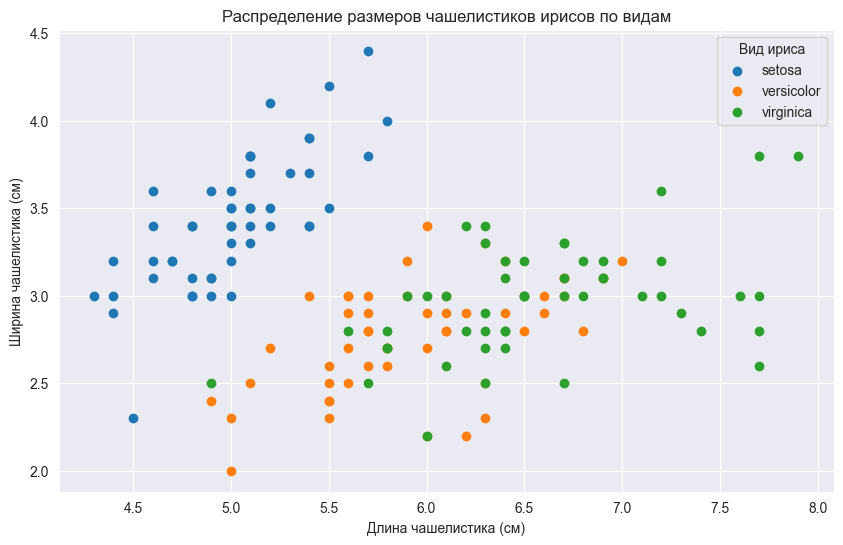

In [191]:
# visualisation of iris species
visual_iris_df = iris_df
visual_iris_df['species'] = iris.target_names[iris.target]

plt.figure(figsize=(10, 6))
for species, group in visual_iris_df.groupby('species'):
    plt.scatter(group['sepal length (cm)'], group['sepal width (cm)'], label=species)

plt.title('Распределение размеров чашелистиков ирисов по видам')
plt.xlabel('Длина чашелистика (см)')
plt.ylabel('Ширина чашелистика (см)')
plt.legend(title='Вид ириса')
plt.show()

In [192]:
# goal column definition
iris_df['target'] = iris.target

In [193]:
# keep just 2 classes -> Iris Versicolor & Iris Virginica
filtered_iris_df = iris_df[(iris_df['target'] == 1) | (iris_df['target'] == 2)]

In [194]:
# check prepared dataset head
filtered_iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,target
50,7.0,3.2,4.7,1.4,versicolor,1
51,6.4,3.2,4.5,1.5,versicolor,1
52,6.9,3.1,4.9,1.5,versicolor,1
53,5.5,2.3,4.0,1.3,versicolor,1
54,6.5,2.8,4.6,1.5,versicolor,1


# 2. Самостоятельно реализуйте логистическую регрессию, без использования метода LogisticRegression из библиотеки. Можете использовать библиотеки pandas, numpy, math для реализации. Оформите в виде функции. *Оформите в виде класса с методами.

In [195]:
# prepare axis X & Y based of filtered dataset
X = filtered_iris_df.drop('target', axis=1).values
# Represent dataset values to 0 & 1 values
y = filtered_iris_df['target'].apply(lambda x: 0 if x == 1 else 1).values

In [196]:
# Class LogisticRegression (manual)
class LogisticRegressionManual:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Init params of weights[] and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.num_iterations):
            # Debugging: Print shapes and types
            print("X shape:", X.shape)
            print("Weights shape:", self.weights.shape)
            print("Bias type:", type(self.bias))
            
            # Linear forecasting model
            linear_model = np.dot(X, self.weights) + self.bias
            # Call sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # Calculate gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]
    
    # 3. score function
    def score(self, X, y):
        y_predicted_cls = self.predict(X)
        return np.mean(y_predicted_cls == y)

In [197]:
# Check columns in filtered_iris_df
print(filtered_iris_df.columns)

# If there is an extra column, exclude it explicitly when creating X
X = filtered_iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species', 'target'],
      dtype='object')


In [198]:
# Teach LR (manual) model
model = LogisticRegressionManual(learning_rate=0.01, num_iterations=1000)
model.fit(X, y)

# Predict
predictions = model.predict(X)

# Check first 10 predictions
predictions[:10]

X shape: (100, 4)
Weights shape: (4,)
Bias type: <class 'int'>
X shape: (100, 4)
Weights shape: (4,)
Bias type: <class 'numpy.float64'>
X shape: (100, 4)
Weights shape: (4,)
Bias type: <class 'numpy.float64'>
X shape: (100, 4)
Weights shape: (4,)
Bias type: <class 'numpy.float64'>
X shape: (100, 4)
Weights shape: (4,)
Bias type: <class 'numpy.float64'>
X shape: (100, 4)
Weights shape: (4,)
Bias type: <class 'numpy.float64'>
X shape: (100, 4)
Weights shape: (4,)
Bias type: <class 'numpy.float64'>
X shape: (100, 4)
Weights shape: (4,)
Bias type: <class 'numpy.float64'>
X shape: (100, 4)
Weights shape: (4,)
Bias type: <class 'numpy.float64'>
X shape: (100, 4)
Weights shape: (4,)
Bias type: <class 'numpy.float64'>
X shape: (100, 4)
Weights shape: (4,)
Bias type: <class 'numpy.float64'>
X shape: (100, 4)
Weights shape: (4,)
Bias type: <class 'numpy.float64'>
X shape: (100, 4)
Weights shape: (4,)
Bias type: <class 'numpy.float64'>
X shape: (100, 4)
Weights shape: (4,)
Bias type: <class 'nump

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# 3. Реализуйте метод градиентного спуска. Обучите логистическую регрессию этим методом. Выберете и посчитайте метрику качества. Метрика должна быть одинакова для всех пунктов домашнего задания. Для упрощения сравнения выберете только одну метрику.

In [199]:
# Calculate accuracy of model
accuracy = model.score(X, y)
print(f"Accuracy: {accuracy}")

Accuracy: 0.96


# 4. Повторите п. 3 для метода скользящего среднего (Root Mean Square Propagation, RMSProp)

In [200]:
# Logistic Regression (RMSProp)
class LogisticRegressionRMSProp:
    def __init__(self, learning_rate=0.01, num_iterations=10000, rho=0.9, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.rho = rho
        self.epsilon = epsilon
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        S_dw = np.zeros(n_features)
        S_db = 0

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            S_dw = self.rho * S_dw + (1 - self.rho) * dw**2
            S_db = self.rho * S_db + (1 - self.rho) * db**2

            self.weights -= (self.learning_rate / (np.sqrt(S_dw) + self.epsilon)) * dw
            self.bias -= (self.learning_rate / (np.sqrt(S_db) + self.epsilon)) * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        return np.array([1 if i > 0.5 else 0 for i in y_predicted])

    def score(self, X, y):
        y_predicted_cls = self.predict(X)
        return np.mean(y_predicted_cls == y)

In [201]:
# Teach model
model = LogisticRegressionRMSProp(learning_rate=0.01, num_iterations=10000, rho=0.9, epsilon=1e-8)
model.fit(X, y)

In [202]:
# Calculate accuracy
accuracy = model.score(X, y)
print(f"Accuracy: {accuracy}")

Accuracy: 0.98


# 5. Повторите п. 3 для ускоренного по Нестерову метода адаптивной оценки моментов (Nesterov–accelerated Adaptive Moment Estimation, Nadam).

In [203]:
# Logistic Regression (Nadam)
class LogisticRegressionNadam:
    def __init__(self, learning_rate=0.001, num_iterations=10000, beta_1=0.9, beta_2=0.999, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        self.epsilon = epsilon
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        m_dw, m_db = 0, 0
        v_dw, v_db = 0, 0
        m_dw_corr, m_db_corr = 0, 0
        v_dw_corr, v_db_corr = 0, 0

        for i in range(1, self.num_iterations + 1):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            m_dw = self.beta_1 * m_dw + (1 - self.beta_1) * dw
            m_db = self.beta_1 * m_db + (1 - self.beta_1) * db
            v_dw = self.beta_2 * v_dw + (1 - self.beta_2) * (dw ** 2)
            v_db = self.beta_2 * v_db + (1 - self.beta_2) * (db ** 2)

            m_dw_corr = m_dw / (1 - self.beta_1 ** i)
            m_db_corr = m_db / (1 - self.beta_1 ** i)
            v_dw_corr = v_dw / (1 - self.beta_2 ** i)
            v_db_corr = v_db / (1 - self.beta_2 ** i)

            m_dw_hat = self.beta_1 * m_dw_corr + (1 - self.beta_1) * dw / (1 - self.beta_1 ** i)
            m_db_hat = self.beta_1 * m_db_corr + (1 - self.beta_1) * db / (1 - self.beta_1 ** i)

            self.weights -= self.learning_rate * m_dw_hat / (np.sqrt(v_dw_corr) + self.epsilon)
            self.bias -= self.learning_rate * m_db_hat / (np.sqrt(v_db_corr) + self.epsilon)

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        return np.array([1 if i > 0.5 else 0 for i in y_predicted])

    def score(self, X, y):
        y_predicted_cls = self.predict(X)
        return np.mean(y_predicted_cls == y)

In [204]:
# Teach model
model = LogisticRegressionNadam(learning_rate=0.001, num_iterations=10000)
model.fit(X, y)

In [205]:
# Calculate accuracy
accuracy = model.score(X, y)
print(f"Accuracy: {accuracy}")

Accuracy: 0.97


| Метод оптимизации | Accuracy |
|-------------------|----------|
| Градиентный спуск | 0.96     |
| RMSProp           | 0.98     |
| Nadam             | 0.97     |

**Вывод:**

Все методы показали высокую точность на датасете ирисов. RMSProp оказался наиболее эффективным с Accuracy 0.98, что может быть связано с его способностью адаптировать скорость обучения индивидуально для каждого параметра. Nadam и градиентный спуск также показали хорошие результаты, но немного уступили RMSProp. Выбор метода оптимизации зависит от конкретных условий задачи и может варьироваться в зависимости от требований к точности и вычислительным ресурсам.